In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = r'C:\Users\aaani\OneDrive - Birmingham City University\Postgrad\Dissertation\Data'
admissions = pd.read_csv(f'{data_path}/admissions.csv/admissions.csv')
patients = pd.read_csv(f'{data_path}/patients.csv/patients.csv')
admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0


In [3]:
patients.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000058,F,33,2168,2020 - 2022,NaN
3,10000068,F,19,2160,2008 - 2010,NaN
4,10000084,M,72,2160,2017 - 2019,2161-02-13


In [4]:
merged = pd.merge(admissions, patients, on='subject_id', how='inner')
merged.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,marital_status,race,edregtime,edouttime,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,...,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,F,52,2180,2014 - 2016,2180-09-09
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,...,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,F,52,2180,2014 - 2016,2180-09-09
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,...,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,F,52,2180,2014 - 2016,2180-09-09
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,...,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,F,52,2180,2014 - 2016,2180-09-09
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,...,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0,F,19,2160,2008 - 2010,NaN


In [7]:
# admittime is a datetime object
merged['admittime'] = pd.to_datetime(merged['admittime'])

# For each patient, find the year of their first shifted admission
first_admission_year_shifted = merged.groupby('subject_id')['admittime'].min().dt.year

# Map the earliest shifted year back to every admission for each patient
merged['first_admission_year_shifted'] = merged['subject_id'].map(first_admission_year_shifted)

# Calculate the unique date shift for each patient
merged['date_shift'] = merged['first_admission_year_shifted'] - merged['anchor_year']

# Create true_admission_year column by subtracting the shift
merged['true_admission_year'] = merged['admittime'].dt.year - merged['date_shift']

merged['age_at_admission'] = merged['anchor_age'] + (merged['true_admission_year'] - merged['anchor_year'])

merged.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod,first_admission_year_shifted,date_shift,true_admission_year,age_at_admission
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,...,0,F,52,2180,2014 - 2016,2180-09-09,2180,0,2180,52
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,...,0,F,52,2180,2014 - 2016,2180-09-09,2180,0,2180,52
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,...,0,F,52,2180,2014 - 2016,2180-09-09,2180,0,2180,52
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,...,0,F,52,2180,2014 - 2016,2180-09-09,2180,0,2180,52
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,...,0,F,19,2160,2008 - 2010,NaN,2160,0,2160,19


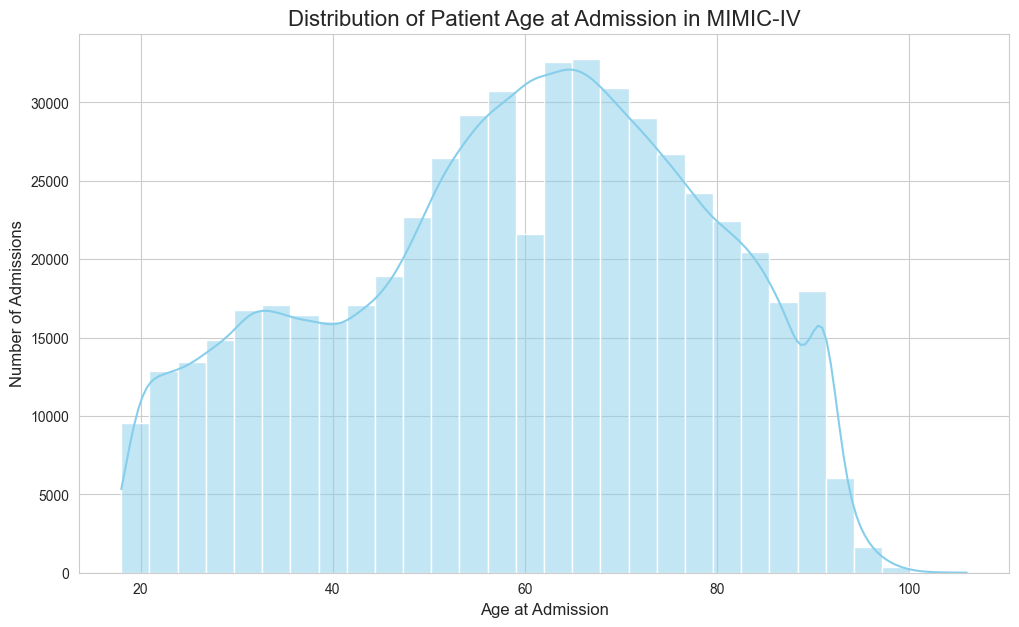

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

sns.histplot(merged['age_at_admission'], bins=30, kde=True, color='skyblue')


plt.title('Distribution of Patient Age at Admission in MIMIC-IV', fontsize=16)
plt.xlabel('Age at Admission', fontsize=12)
plt.ylabel('Number of Admissions', fontsize=12)

# Saving the plot as an image file 
plt.savefig('age_distribution.png')


In [10]:
# Displaying unique anchor years
unique_anchor_years = merged['anchor_year_group'].unique()
unique_anchor_years.sort()
print("Unique Anchor Years:", unique_anchor_years)

Unique Anchor Years: ['2008 - 2010' '2011 - 2013' '2014 - 2016' '2017 - 2019' '2020 - 2022']


In [11]:
historical_groups = ['2008 - 2010', '2011 - 2013', '2014 - 2016']
contemporary_groups = ['2017 - 2019', '2020 - 2022']

historical = merged[merged['anchor_year_group'].isin(historical_groups)]
contemporary = merged[merged['anchor_year_group'].isin(contemporary_groups)]

historical_age_distribution = historical['age_at_admission'].describe()
contemporary_age_distribution = contemporary['age_at_admission'].describe()

print("Historical Age Distribution:\n", historical_age_distribution)
print("\nContemporary Age Distribution:\n", contemporary_age_distribution)

historical.head() 

Historical Age Distribution:
 count    433687.000000
mean         58.938262
std          19.123342
min          18.000000
25%          45.000000
50%          60.000000
75%          74.000000
max         106.000000
Name: age_at_admission, dtype: float64

Contemporary Age Distribution:
 count    112341.000000
mean         58.206274
std          19.647701
min          18.000000
25%          43.000000
50%          61.000000
75%          73.000000
max          97.000000
Name: age_at_admission, dtype: float64


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod,first_admission_year_shifted,date_shift,true_admission_year,age_at_admission
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,...,0,F,52,2180,2014 - 2016,2180-09-09,2180,0,2180,52
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,...,0,F,52,2180,2014 - 2016,2180-09-09,2180,0,2180,52
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,...,0,F,52,2180,2014 - 2016,2180-09-09,2180,0,2180,52
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,...,0,F,52,2180,2014 - 2016,2180-09-09,2180,0,2180,52
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,...,0,F,19,2160,2008 - 2010,NaN,2160,0,2160,19


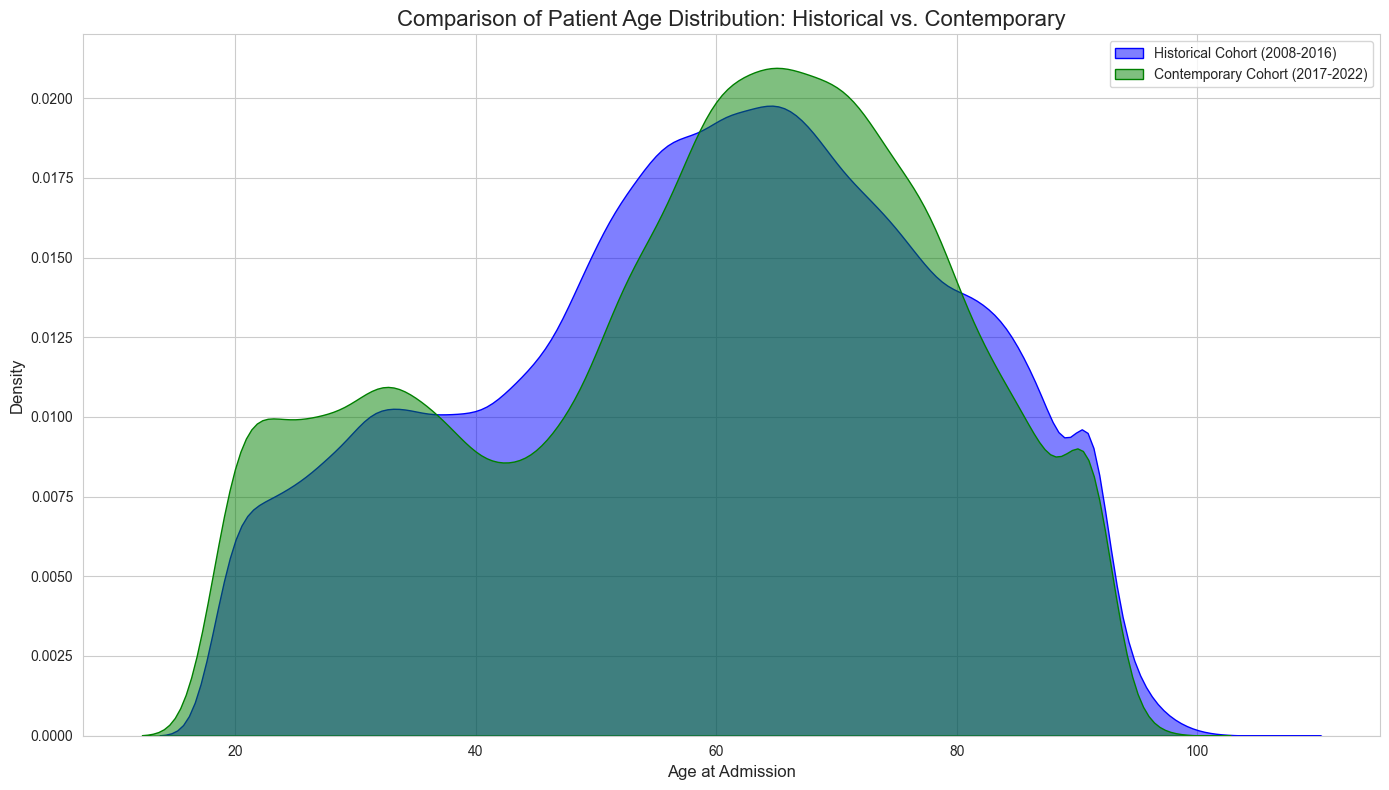

In [ ]:
sns.set_style("whitegrid")

# Create a figure for the plot
plt.figure(figsize=(14, 8))

# Plot the distribution of age for the historical cohort
sns.kdeplot(historical['age_at_admission'], label='Historical Cohort (2008-2016)', color='blue', fill=True, alpha=0.5)

# Plot the distribution of age for the contemporary cohort on the same axes
sns.kdeplot(contemporary['age_at_admission'], label='Contemporary Cohort (2017-2022)', color='green', fill=True, alpha=0.5)

# Add titles, labels, and a legend
plt.title('Comparison of Patient Age Distribution: Historical vs. Contemporary', fontsize=16)
plt.xlabel('Age at Admission', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the new plot as an image file
plt.savefig('age_distribution_comparison.png')

#This is important as it provided visual evidence of a data drift
